## Reference:
- https://www.kaggle.com/kaushal2896/global-wheat-detection-starter-eda

In [1]:
from imutils import paths
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
train_df = pd.read_csv("train.csv")
train_df.head()

,image_id,width,height,bbox,source
0,b6ab77fd7,1024,1024,"[834.0, 222.0, 56.0, 36.0]",usask_1
1,b6ab77fd7,1024,1024,"[226.0, 548.0, 130.0, 58.0]",usask_1
2,b6ab77fd7,1024,1024,"[377.0, 504.0, 74.0, 160.0]",usask_1
3,b6ab77fd7,1024,1024,"[834.0, 95.0, 109.0, 107.0]",usask_1
4,b6ab77fd7,1024,1024,"[26.0, 144.0, 124.0, 117.0]",usask_1


From [this description](https://www.kaggle.com/c/global-wheat-detection/data), we have - 

- image_id - the unique image ID
- width, height - the width and height of the images
- bbox - a bounding box, formatted as a Python-style list of [xmin, ymin, width, height]
- etc.

It's important to note that not all images have bounding boxes.

In [3]:
# How many unique images?
len(train_df["image_id"].unique())

3373

In [4]:
# Total number of entries
train_df.shape[0]

147793

In [5]:
# Total number of images in the training directory
len(list(paths.list_images("train")))

3422

This means that `3422 - 3373` i.e. **49 images** do not have any annotations. [This notebook](https://www.kaggle.com/kaushal2896/global-wheat-detection-starter-eda) does an excellent job at providing more insights. Be sure to check it out. 

In [6]:
from tqdm import tqdm
import ast

In [7]:
# Separating out the coordinates
xmin, ymin, width, height = [], [], [], []

for i in tqdm(train_df["bbox"]):
    cooridinates_list = ast.literal_eval(i)
    xmin.append(cooridinates_list[0])
    ymin.append(cooridinates_list[1])
    width.append(cooridinates_list[2])
    height.append(cooridinates_list[3])

100%|██████████| 147793/147793 [00:01<00:00, 76069.80it/s]


In [8]:
len(xmin), len(ymin), len(width), len(height)

(147793, 147793, 147793, 147793)

In [9]:
train_df["xmin"] = xmin
train_df["ymin"] = ymin
train_df["width"] = width
train_df["height"] = height
train_df.head()

,image_id,width,height,bbox,source,xmin,ymin
0,b6ab77fd7,56.0,36.0,"[834.0, 222.0, 56.0, 36.0]",usask_1,834.0,222.0
1,b6ab77fd7,130.0,58.0,"[226.0, 548.0, 130.0, 58.0]",usask_1,226.0,548.0
2,b6ab77fd7,74.0,160.0,"[377.0, 504.0, 74.0, 160.0]",usask_1,377.0,504.0
3,b6ab77fd7,109.0,107.0,"[834.0, 95.0, 109.0, 107.0]",usask_1,834.0,95.0
4,b6ab77fd7,124.0,117.0,"[26.0, 144.0, 124.0, 117.0]",usask_1,26.0,144.0


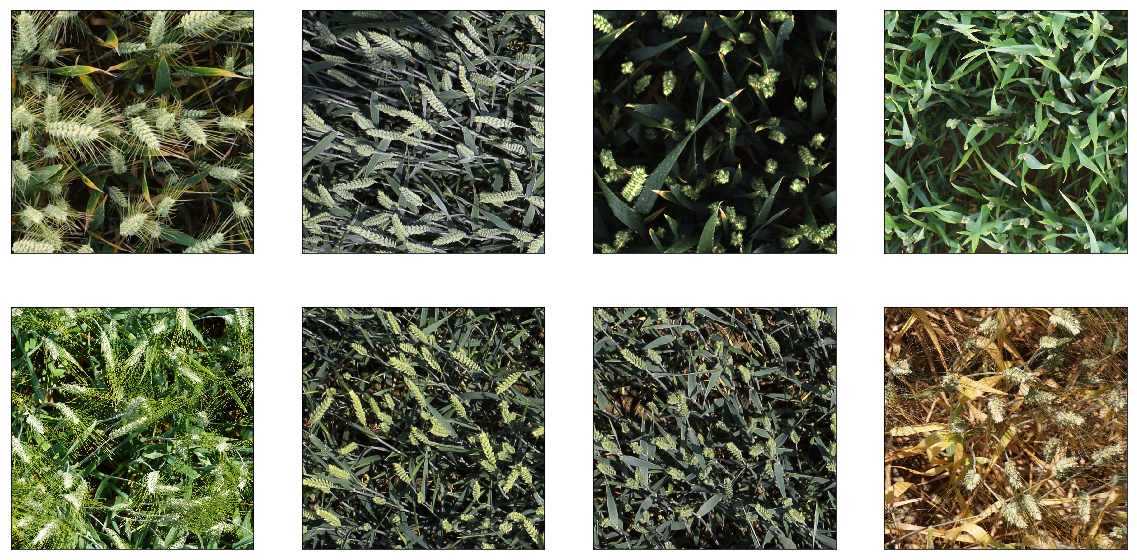

In [10]:
# Visualizing some samples from the training set

sample_indices = np.random.choice(np.unique(train_df["image_id"].tolist()), 8)

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
count=0

for row in ax:
    for col in row:
        img = plt.imread("train/" + sample_indices[count] + ".jpg")
        col.grid(False)
        col.set_xticks([])
        col.set_yticks([])
        col.imshow(img)
        count += 1
plt.show()

In [11]:
# Visualize the images with bounding boxes
import matplotlib.patches as patches

def get_bbox(image_id, df, col, color='white'):
    bboxes = df[df['image_id'] == image_id]
    
    for i in range(len(bboxes)):
        # Create a Rectangle patch
        rect = patches.Rectangle(
            (bboxes['xmin'].iloc[i], bboxes['ymin'].iloc[i]),
            bboxes['width'].iloc[i], 
            bboxes['height'].iloc[i], 
            linewidth=2, 
            edgecolor=color, 
            facecolor='none')

        # Add the patch to the Axes
        col.add_patch(rect)

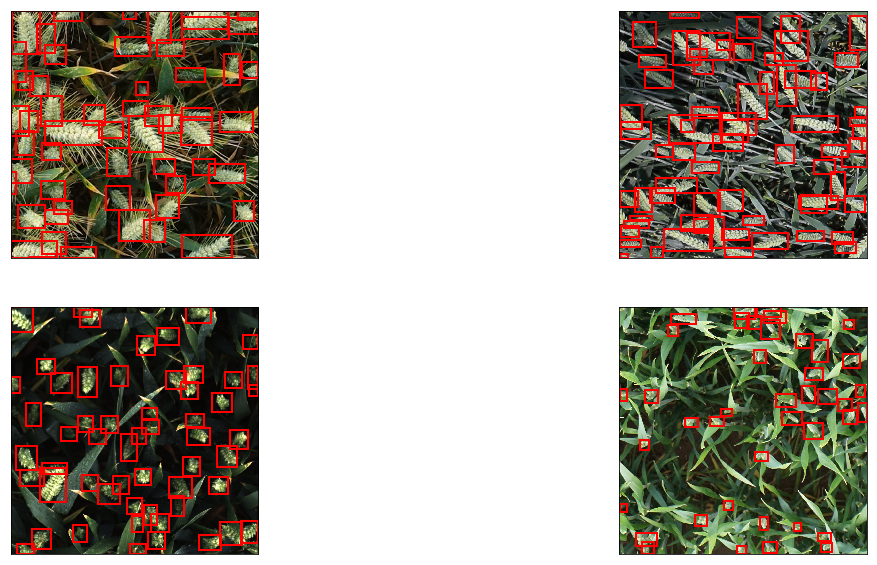

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
count=0
for row in ax:
    for col in row:
        img = plt.imread("train/" + sample_indices[count] + ".jpg")
        col.grid(False)
        col.set_xticks([])
        col.set_yticks([])
        get_bbox(sample_indices[count], train_df, col, color='red')
        col.imshow(img)
        count += 1
plt.show()

In [13]:
# Images without bounding box
images_w_bbox = train_df["image_id"].unique()
images_w_bbox = ["train/" + image_id + ".jpg" for image_id in images_w_bbox]

all_images = list(paths.list_images("train"))

In [14]:
images_w_bbox[:5]

['train/b6ab77fd7.jpg',
 'train/b53afdf5c.jpg',
 'train/7b72ea0fb.jpg',
 'train/91c9d9c38.jpg',
 'train/41c0123cc.jpg']

In [15]:
all_images[:5]

['train/c04c3f192.jpg',
 'train/64c39c542.jpg',
 'train/62ec8d906.jpg',
 'train/88136bbdd.jpg',
 'train/2ac5f9e85.jpg']

In [16]:
images_wo_bbox = list(set(all_images) - set(images_w_bbox))
images_wo_bbox[:5]

['train/ffbb9c623.jpg',
 'train/3116768f0.jpg',
 'train/cfc9040ca.jpg',
 'train/581eaf87b.jpg',
 'train/69352f3fa.jpg']

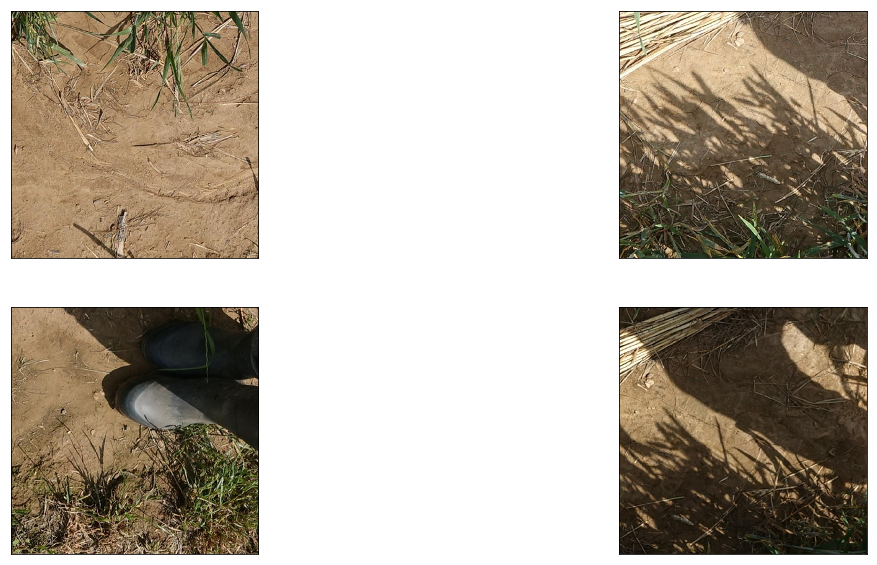

In [18]:
# Visualizing some images without any wheat heads

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
count=0

for row in ax:
    for col in row:
        img = plt.imread(images_wo_bbox[count])
        col.grid(False)
        col.set_xticks([])
        col.set_yticks([])
        col.imshow(img)
        count += 1
plt.show()

In [18]:
# Serialize `train_df` to a .csv file
train_df.to_csv("train_df.csv", index=False)
!head -5 train_df.csv

image_id,width,height,bbox,source,xmin,ymin
b6ab77fd7,56.0,36.0,"[834.0, 222.0, 56.0, 36.0]",usask_1,834.0,222.0
b6ab77fd7,130.0,58.0,"[226.0, 548.0, 130.0, 58.0]",usask_1,226.0,548.0
b6ab77fd7,74.0,160.0,"[377.0, 504.0, 74.0, 160.0]",usask_1,377.0,504.0
b6ab77fd7,109.0,107.0,"[834.0, 95.0, 109.0, 107.0]",usask_1,834.0,95.0
